In [1]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('seaborn')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def erk2(u, tau, M, mass, G, f):
    for m in range(M):
        w_1 = f(u[m],mass, G)
        w_2 = f(u[m] + tau*2/3*w_1, mass, G)
        u[m + 1] = u[m] + tau*(1/4*w_1 + 3/4*w_2)    
    return u

def erk3(u, tau, M, mass, G, f):
    for m in range(M):
        w_1 = f(u[m],mass, G)
        w_2 = f(u[m] + tau*1/2*w_1, mass, G)
        w_3 = f(u[m] + tau*3/4*w_2, mass, G)
        u[m + 1] = u[m] + tau*(2/9*w_1 + 3/9*w_2 + 4/9*w_3)    
    return u

def erk4(u, tau, M, mass, G, f):
    for m in range(M):
        w_1 = f(u[m], mass, G)
        w_2 = f(u[m] + tau*1/2*w_1, mass, G)
        w_3 = f(u[m] + tau*1/2*w_2, mass, G)
        w_4 = f(u[m] + tau*w_3, mass, G)
        u[m + 1] = u[m] + tau*(1/6*w_1 + 1/3*w_2 + 1/3*w_3 + 1/6*w_4)
        
    return u

In [3]:
def modeling(u, mass, G):
    f = np.zeros(4)
    R3 = np.sqrt(u[0]**2 + u[1]**2)**3
    f[0] = u[2]
    f[1] = u[3] 
    f[2] = -G*mass*u[0]/R3
    f[3] = -G*mass*u[1]/R3
    return f

def plot_trajectory(x, y, name='Earth'):
    plt.figure(figsize=(16, 5))
    plt.plot(x, y, '-o', markersize=5)
    plt.plot([0], [0], '-o', color='orange')
    plt.xlabel('X, m'); plt.ylabel('Y, m')
    plt.grid(1)
    plt.suptitle(f'Trajectory of {name}')
    plt.show()

In [4]:
mass = 1.989*10**30 
G = 6.67*10**(-11)

In [5]:
def local_thickening__method(eps, u, M, t_0, T, f=modeling):
    norma = lambda u1, u2: (np.sum((u1 - u2)**2))**(1/2) or eps
    
    def step_erk4(tau, u0):
        w_1 = f(u0, mass, G)
        w_2 = f(u0 + tau*1/2*w_1, mass, G)
        w_3 = f(u0 + tau*1/2*w_2, mass, G)
        w_4 = f(u0 + tau*w_3, mass, G)
        u1 = u0 + tau*(1/6*w_1 + 1/3*w_2 + 1/3*w_3 + 1/6*w_4)
        return u1
    
    tau = [(T - t_0) / M]
    p = 4
    for m in range(M):
        u1 = step_erk4(tau[m], u[m])
        u2 = step_erk4(tau[m]/2, u[m])
        u2 = step_erk4(tau[m]/2, u2)
        tay = tau[m]*(eps*tau[m]*(2**p-1) / ( (T-t_0)*norma(u1, u2) ))**(1/p)
        u[m + 1] = step_erk4(tay, u[m])
        tau.append(tay)
    
    return u, tau[1:]

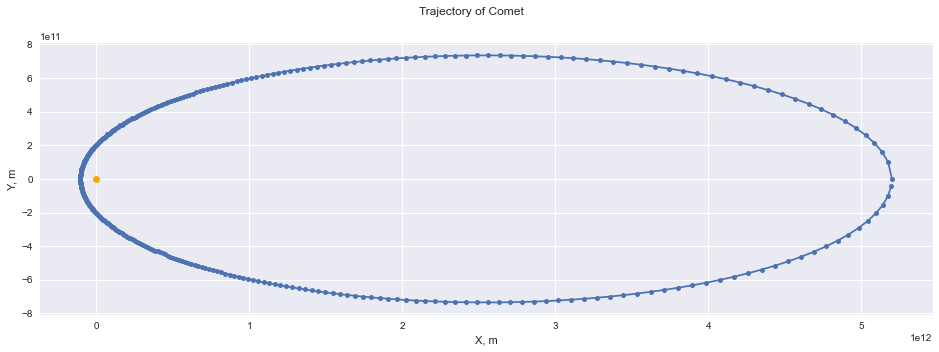

In [6]:
t_0 = 0.; T = 75*365*24*60*60 
M = 365
eps = 5*10**4 # eps = 50km

u = np.zeros((M + 1, 4))
u[0,0] = 5.2*10**9*1000 # x
u[0,1] = 0. #  y
u[0,2] = 0. #  Vx
u[0,3] = 1000 # Vy

u, tau = local_thickening__method(eps, u, M, t_0, T)

x = u[:, 0]
y = u[:, 1]
plot_trajectory(x, y, name='Comet')

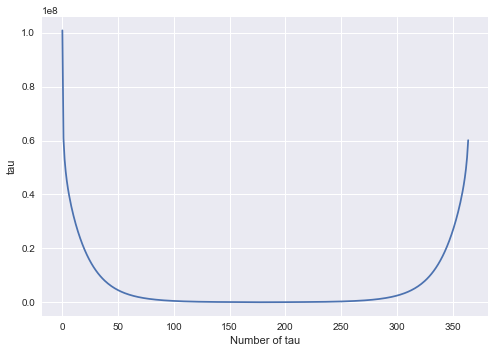

In [7]:
plt.plot(tau)
plt.xlabel('Number of tau'); plt.ylabel('tau')
plt.show()

In [8]:
def nested_schema_method(eps, u, M, t_0, T, f=modeling):
    norma = lambda u1, u2: (np.sum((u1 - u2)**2))**(1/2) or eps
    
    tau = [(T - t_0) / M]
    p = 3
    for m in range(M):
        w_1 = f(u[m], mass, G)
        w_2 = f(u[m] + tau[m]*2/3*w_1, mass, G) # !!!!! изменить коэф
        u2 = u[m] + tau[m]*(1/4*w_1 + 3/4*w_2)
        
        w_2 = f(u[m] + tau[m]*1/2*w_1, mass, G) # !!!!! изменить коэф
        w_3 = f(u[m] + tau[m]*3/4*w_2, mass, G)
        u1 = u[m] + tau[m]*(2/9*w_1 + 3/9*w_2 + 4/9*w_3) 
        
        tay = tau[m] * (eps * tau[m] / ((T - t_0) * norma(u1, u2)))**(1 / (p - 1))
        w_1 = f(u[m], mass, G)
        w_2 = f(u[m] + tay*1/2*w_1, mass, G) # !!!!! изменить коэф
        w_3 = f(u[m] + tay*3/4*w_2, mass, G)
        u[m + 1] = u[m] + tay*(2/9*w_1 + 3/9*w_2 + 4/9*w_3) 
        tau.append(tay)
    
    return u, tau[1:]

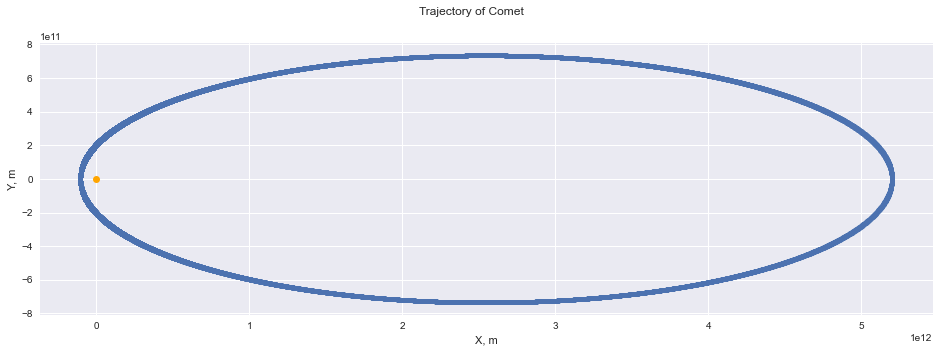

In [9]:
t_0 = 0.; T = 75*365*24*60*60 
M = 35*10**3
eps = 10**6# eps = 5000km

u = np.zeros((M + 1, 4))
u[0,0] = 5.2*10**9*1000 # x
u[0,1] = 0. #  y
u[0,2] = 0. #  Vx
u[0,3] = 1000 # Vy

u, tau = nested_schema_method(eps, u, M, t_0, T)

x = u[:, 0]
y = u[:, 1]
plot_trajectory(x, y, name='Comet')

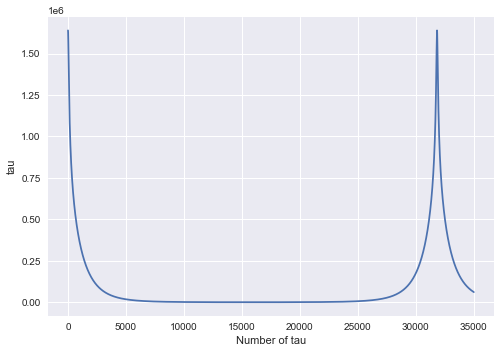

In [10]:
plt.plot(tau)
plt.xlabel('Number of tau'); plt.ylabel('tau')
plt.show()